In [2]:
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:

# Optional: Configure plots for inline display if using a Jupyter Notebook
%matplotlib inline

# Load the SPSS file
file_path = '../data/Western Europe/Western Europe Public Data_Church Tax Added.sav'
df, meta = prs.read_sav(file_path)

# Display the shape and first few rows of the DataFrame
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()



Dataset Shape: (26096, 369)
Columns: ['QRID', 'country', 'weight', 'Q1', 'Q2', 'Q4a', 'Q4b', 'Q4c', 'Q4d', 'Q4e', 'Q4f', 'Q4g', 'Q4h', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8', 'q9_98', 'q9_99', 'Q10a', 'Q10b', 'Q10c', 'Q11', 'Q13', 'Q14a', 'Q14b', 'QCURRELrec', 'QCURRELDrec', 'qdenomautrec', 'QDENOMBEG', 'QDENOMDNK', 'qdenomfinrec', 'qdenomfrarec', 'qdenomdeurec', 'QDENOMIRL', 'qdenomitarec', 'qdenomnldrec', 'QDENOMNOR', 'qdenomprtrec', 'qdenomslorec', 'qdenomesprec', 'QDENOMSWE', 'qdenomcherec', 'qdenomgbrrec', 'Q15a', 'Q15b', 'Q16', 'Q17', 'Q19a', 'Q19b', 'Q19c', 'Q19d', 'Q19e', 'Q19f', 'Q20a', 'Q20b', 'Q20c', 'Q20d', 'Q20e', 'Q20f', 'Q20g', 'Q20h', 'QCHRELrec', 'qchdenomautrec', 'qchdenombegrec', 'QCHDENOMDNK', 'qchdenomfinrec', 'qchdenomfrarec', 'qchdenomdeurec', 'qchdenomirlrec', 'qchdenomitarec', 'qchdenomnldrec', 'QCHDENOMNOR', 'qchdenomprtrec', 'qchdenomslorec', 'qchdenomesprec', 'QCHDENOMSWE', 'qchdenomcherec', 'qchdenomgbrrec', '

,QRID,country,weight,Q1,Q2,Q4a,Q4b,Q4c,Q4d,Q4e,...,QS11PRT,QS12PRT,QS12SLO,QS11ESP,QS12ESP,QS11SWE,QS12SWE,QS12CHE,QS11GBR,ISCED
0,1006015.0,1.0,0.312580,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,1012247.0,1.0,2.165165,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,1012251.0,1.0,1.583167,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,1012271.0,1.0,0.705469,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,1012279.0,1.0,2.420254,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [4]:
# Check missing values
print("\nMissing values per column:")
num_missing = df.isnull().sum()
print(num_missing.loc[num_missing > 0])


Missing values per column:
Q9_1       20218
Q9_2       20218
Q9_3       20218
Q9_4       20218
Q9_5       20218
           ...  
QS12ESP    24597
QS11SWE    24622
QS12SWE    24603
QS12CHE    24410
QS11GBR    24368
Length: 289, dtype: int64


## Explore the data

In [5]:
if meta.variable_value_labels.get('country'):
    country_mapping = meta.variable_value_labels.get('country')
    df['COUNTRY_readable'] = df['country'].map(country_mapping)

### Replace some questions from survey answers with textual options

In [6]:
if meta.variable_value_labels.get('COUNTRY'):
    country_mapping = meta.variable_value_labels.get('COUNTRY')
    df['COUNTRY_readable'] = df['COUNTRY'].map(country_mapping)

if meta.variable_value_labels.get('Q1'):
    q1_mapping = meta.variable_value_labels.get('Q1')
    # Create a new column with the readable labels
    df['Q1_readable'] = df['Q1'].map(q1_mapping)
else:
    print("No value labels found for Q1.")

In [7]:
## General code analysis

/tmp/ipykernel_5417/715966468.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


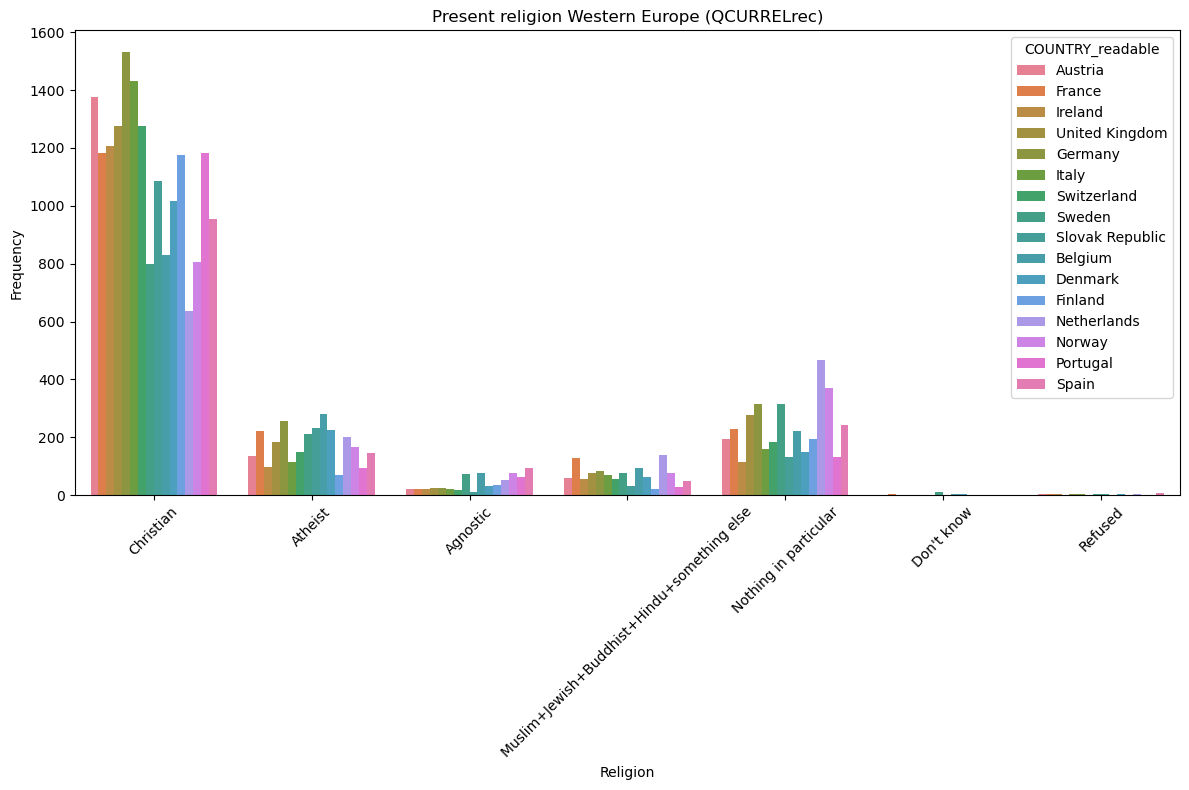

In [10]:
label_mapping = {}
if meta.variable_value_labels.get('QCURRELrec'):
    label_mapping = meta.variable_value_labels.get('QCURRELrec')
else:
    print("No value labels found for QCURRELrec.")

# Determine the order of categories (adjust if needed)
order = sorted(df['QCURRELrec'].dropna().unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='QCURRELrec', hue='COUNTRY_readable', order=order)
new_labels = [label_mapping.get(val, val) for val in order]
ax.set_xticklabels(new_labels)
plt.title('Present religion Western Europe (QCURRELrec)')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/religion_western_europe.png")

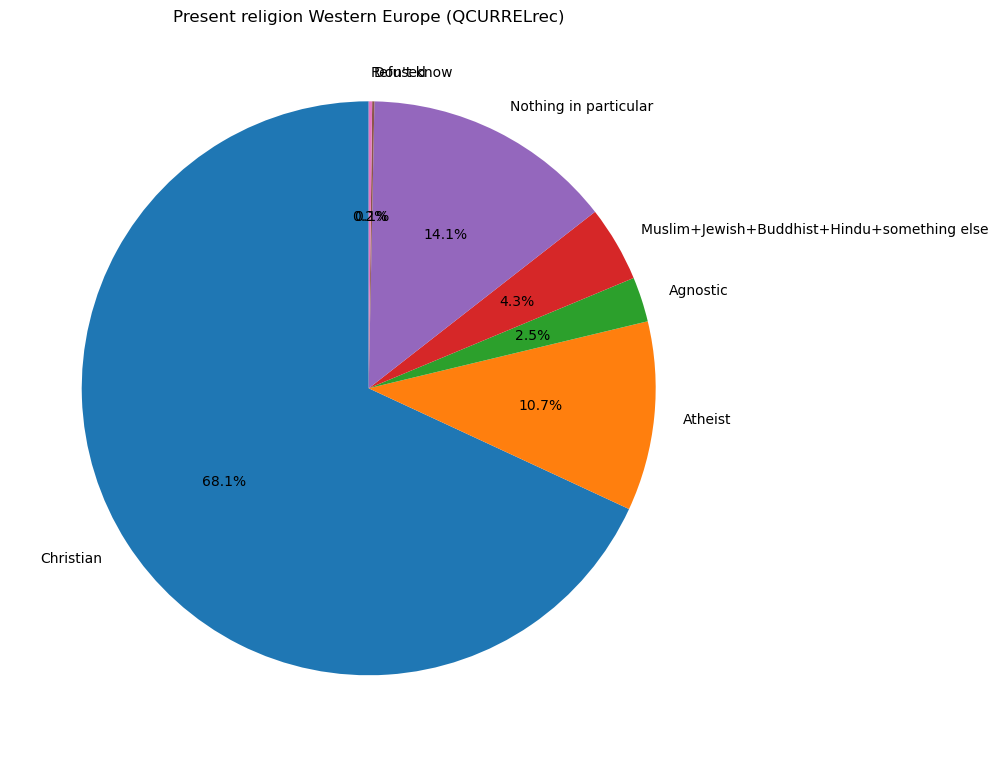

In [32]:
counts = df['QCURRELrec'].value_counts(dropna=True)

# Ensure the counts are in a sorted order, similar to the original order specification
order = sorted(df['QCURRELrec'].dropna().unique())
counts = counts.reindex(order)

# Map the category values to their corresponding labels
labels = [label_mapping.get(val, val) for val in counts.index]

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Present religion Western Europe (QCURRELrec)')
plt.tight_layout()

# Save the figure to a file
plt.savefig("figures/religion_western_europe_pie_chart.png")
plt.show()

Unique economic state responses: ['Somewhat good' 'Very good' 'Very bad' 'Somewhat bad'
 'Refused (DO NOT READ)' "Don't know (DO NOT READ)"]
Using country column: country


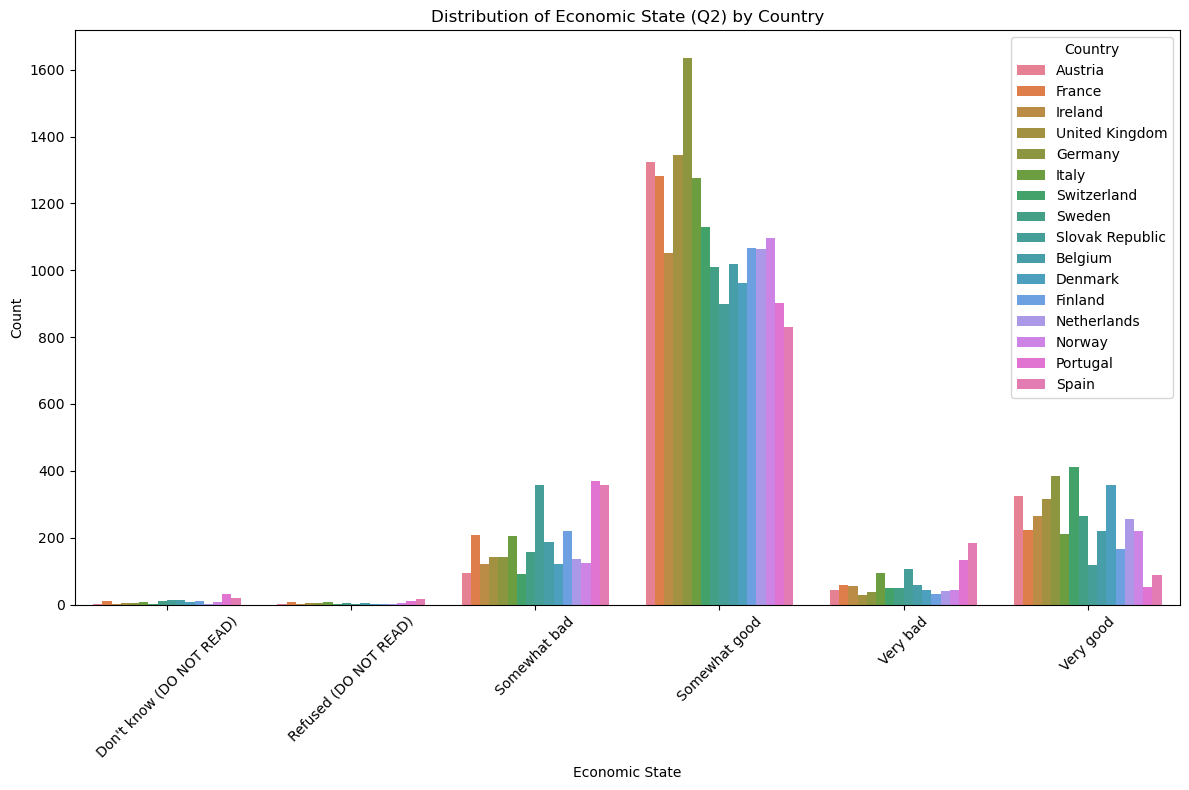

In [ ]:
mapping_q2 = meta.variable_value_labels.get('Q2')
if mapping_q2 is None:
    print("No value labels found for Q2. Using original numeric values.")
    df['Q2_text'] = df['Q2']
else:
    df['Q2_text'] = df['Q2'].map(mapping_q2)

# Check unique responses after mapping
print("Unique economic state responses:", df['Q2_text'].dropna().unique())

# Plot a histogram (using countplot) of the economic state responses for the region,
# with responses broken down by country from the 'COUNTRY' column.
plt.figure(figsize=(12, 8))
order = sorted(df['Q2_text'].dropna().unique())
ax = sns.countplot(data=df, x='Q2_text', hue='COUNTRY_readable', order=order)

plt.title("Distribution of Economic State (Q2) by Country")
plt.xlabel("Economic State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.savefig("figures/Western_Europe_Economic_State.png")